# Spatio-Temporal Sentiment Modelling of Customer Reviews for McDonald’s Stores in the United States

## Problem Statement

In the highly competitive quick-service restaurant (QSR) industry, customer experience is a decisive driver of brand reputation, operational performance, and customer retention. Despite McDonald’s highly standardised operating model across the United States, customer experiences vary substantially across store locations and time periods, reflecting underlying spatial, temporal, and operational heterogeneity.

Traditional customer satisfaction assessment methods, including surveys and internal audits, are limited by low scalability, delayed feedback, and rigid evaluation frameworks. These approaches fail to capture real-time, unsolicited customer perceptions. Conversely, online customer reviews provide a large-scale, temporally continuous, and geographically distributed source of unstructured textual data that encapsulates authentic consumer sentiment. However, the volume, noise, and linguistic complexity of such data introduce significant analytical challenges.

Existing research in the QSR domain predominantly prioritises numerical ratings while underexploiting the semantic richness of review text and largely ignoring spatio-temporal variation. The absence of integrated sentiment, spatial, and temporal analysis restricts a comprehensive understanding of customer experience dynamics.

This research addresses this gap by applying advanced natural language processing and spatio-temporal analytics to large-scale online review data, enabling a unified examination of sentiment patterns across McDonald’s U.S. stores. The study aims to generate data-driven insights that support targeted operational improvements and strategic decision-making.

## Research Aim

The aim of this research is to systematically analyse customer experiences across McDonald’s stores in the United States by integrating large-scale online review data with sentiment analysis and spatio-temporal analytics, in order to identify underlying patterns, temporal trends, and key determinants of customer satisfaction and dissatisfaction.

## Research Objectives

- To systematically quantify customer sentiment from large-scale online textual reviews using advanced Natural Language Processing (NLP) techniques and evaluate its relationship with numerical star ratings.

- To investigate spatial heterogeneity in customer satisfaction by identifying and analysing geographic patterns across McDonald’s store locations within the United States.

- To analyse temporal dynamics in customer sentiment and ratings in order to detect longitudinal shifts in customer perceptions and service performance.

- To evaluate variations in customer experience across store categories and assess the extent to which store type influences sentiment polarity and rating distributions.

- To identify recurring service-related themes and operational issues through sentiment-driven thematic analysis of customer review text.

- To derive robust, data-driven insights that support evidence-based operational optimisation and service quality enhancement within the quick-service restaurant industry.

## Data Collection

The dataset used in this study was collected through systematic web scraping of Google Reviews associated with McDonald’s store locations across the United States. It comprises both structured data—such as store attributes, geographic coordinates, numerical ratings, and review timestamps—and unstructured textual customer reviews.

All reviewer identifiers were anonymised at source, ensuring compliance with ethical research practices and data protection standards. The dataset captures a large-scale and diverse range of real-world customer experiences over an extended temporal span, making it well suited for sentiment analysis, spatial examination, and temporal trend analysis. The absence of personally identifiable information (PII) permits the responsible use of the data for academic research purposes.

# Dataset Source

Dataset Title: McDonald’s Store Reviews

Data Repository: Kaggle

Dataset Author: Nidula Elgiriyewithana

Access Link: - https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews/data

Dataset Description:

The dataset comprises over 33,000 customer reviews of McDonald’s store locations across the United States. It includes numerical star ratings, unstructured textual reviews, review timestamps, store-level metadata, and geographic coordinates. The integration of structured and unstructured attributes enables comprehensive sentiment modelling, geospatial analysis, and temporal trend evaluation, supporting a multifaceted investigation of customer experience dynamics.

# Ethical, GDPR, and University of Hertfordshire Compliance Table

| **Aspect**                              | **Description**                                                             | **Status**   |
| --------------------------------------- | --------------------------------------------------------------------------- | ------------ |
| Data Source                             | Publicly available Kaggle dataset derived from Google Reviews               | Compliant    |
| Nature of Data                          | Secondary data (no direct data collection from participants)                | Compliant    |
| Personal Identifiable Information (PII) | No names, emails, phone numbers, or personal identifiers included           | Compliant    |
| Anonymisation                           | Reviewer identifiers are fully anonymised                                   | Compliant    |
| GDPR Lawful Basis                       | Academic research using publicly available, anonymised data                 | Compliant    |
| Participant Consent                     | Not required (secondary, anonymised public data)                            | Compliant    |
| Sensitive Personal Data                 | No sensitive attributes (health, race, religion, politics) used or inferred | Compliant    |
| Data Minimisation                       | Only variables relevant to research objectives were analysed                | Compliant    |
| Data Usage Purpose                      | Data used solely for academic analysis and reporting                        | Compliant    |
| Data Storage                            | Stored on a password-protected personal device                              | Compliant    |
| Data Sharing                            | Data not shared outside academic submission                                 | Compliant    |
| Risk to Individuals                     | No interaction with individuals; analysis performed at aggregate level      | Minimal Risk |
| Re-identification Risk                  | No attempt to identify or profile individual reviewers                      | Negligible   |
| University of Hertfordshire Ethics      | Meets low-risk exemption criteria for secondary data research               | Compliant    |
| Ethical Approval Requirement            | Formal ethical approval not required                                        | Exempt       |


In [388]:
# ============================================================
# CELL 1 — Imports, Reproducibility, and Thesis-Grade Settings
# ------------------------------------------------------------
# Sets a deterministic environment (random seeds), imports the full stack,
# and defines global plotting defaults for consistent, publication-ready visuals.
# This ensures repeatable results and consistent styling across all figures.
# ============================================================
import re
import math
import os
import sys
import json
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score
)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# Thesis-friendly global matplotlib defaults (no seaborn; clean and readable)
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

Python: 3.13.5
NumPy: 2.3.4
Pandas: 2.3.3


In [389]:
# ============================================================
# CELL 2 — Colour System (Vibrant, Consistent, Thesis-Ready)
# ------------------------------------------------------------
# Defines a semantic, high-contrast palette (pink/rose/red/purple/green) used across plots.
# Consistent colouring improves interpretability and gives your thesis figures a professional look.
# This cell is dataset-agnostic and safe to run anytime.
# ============================================================
COLOR_NEG = "#E11D48"  # rose/red (negative)
COLOR_NEU = "#A855F7"  # purple (neutral)
COLOR_POS = "#22C55E"  # green (positive)

COLOR_PINK   = "#FB7185"
COLOR_ROSE   = "#F43F5E"
COLOR_RED    = "#EF4444"
COLOR_PURPLE = "#8B5CF6"
COLOR_GREEN  = "#10B981"
COLOR_TEAL   = "#14B8A6"

LABEL_COLORS = {"negative": COLOR_NEG, "neutral": COLOR_NEU, "positive": COLOR_POS}

# Beautiful continuous colormaps for dashboards/scatters:
# "plasma" (pink/purple/yellow), "turbo" (very vibrant), "RdPu" (rose/purple)
SCORE_CMAP = "plasma"
DASH_CMAP  = "turbo"

def apply_ax_cosmetics(ax, title=None, xlabel=None, ylabel=None):
    """Apply consistent cosmetics for thesis plots: labels, title, and subtle grid."""
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.25)

In [390]:
# ============================================================
# CELL 3 — DataFrame Safety Check + Quick Preview
# ------------------------------------------------------------
# Verifies that df exists and shows basic dataset info without assuming any column names.
# This prevents KeyErrors later by making the schema explicit at the start of the workflow.
# If df does not exist, we create an empty placeholder to avoid notebook crashes.
# ============================================================
if "df" not in globals():
    print("df not found. Creating an empty DataFrame placeholder (load your data into df and re-run).")
    df = pd.DataFrame()

print("Rows:", len(df))
print("Columns:", df.shape[1])
print("Column names:", list(df.columns)[:50], ("..." if df.shape[1] > 50 else ""))
display(df.head(5))

Rows: 33396
Columns: 21
Column names: ['reviewer_id', 'store_name', 'category', 'store_address', 'latitude', 'longitude', 'rating_count', 'review_time', 'review', 'rating', 'store_name_clean', 'review_clean', 'rating_num', 'rating_count_num', 'review_age_days', 'sentiment_label', 'text_clean', 'text_len', 'proxy_label', 'pred_proxy_label', 'pred_score'] 


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,store_name_clean,review_clean,rating_num,rating_count_num,review_age_days,sentiment_label,text_clean,text_len,proxy_label,pred_proxy_label,pred_score
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.4607,-97.7929,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,McDonald's,Why does it look like someone spit on my food?...,1,1240,NaN,negative,why does it look like someone spit on my food?...,255,NaN,negative,-1.0000
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.4607,-97.7929,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,McDonald's,It'd McDonalds. It is what it is as far as the...,4,1240,NaN,positive,it'd mcdonalds. it is what it is as far as the...,237,NaN,positive,1.0000
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.4607,-97.7929,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,McDonald's,Made a mobile order got to the speaker and che...,1,1240,NaN,negative,made a mobile order got to the speaker and che...,332,NaN,negative,-1.0000
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.4607,-97.7929,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,McDonald's,My mc. Crispy chicken sandwich was ï¿1⁄2ï¿1⁄2ï...,5,1240,NaN,positive,my mc. crispy chicken sandwich was customer se...,67,NaN,positive,1.0000
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.4607,-97.7929,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,McDonald's,"I repeat my order 3 times in the drive thru, a...",1,1240,NaN,negative,"i repeat my order 3 times in the drive thru, a...",312,NaN,negative,-1.0000


In [391]:
# ============================================================
# CELL 4 — Auto-Detect Column Mapping (Robust to Schema Differences)
# ------------------------------------------------------------
# Automatically detects likely text/date/store/lat/lon/rating columns using common name patterns.
# This prevents brittle manual edits and avoids the exact error you hit (missing review_text, etc.).
# You can override any detected column names in CELL 5 if the guess is not correct.
# ============================================================
def pick_col(cols, patterns):
    cols = list(cols)
    cols_lower = [c.lower() for c in cols]
    for pat in patterns:
        rgx = re.compile(pat)
        for i, cl in enumerate(cols_lower):
            if rgx.search(cl):
                return cols[i]
    return None

detected = {}
if len(df.columns) > 0:
    detected["COL_TEXT"] = pick_col(df.columns, [
        r"\breview\s*text\b", r"\btext\b", r"\bcontent\b", r"\bcomment\b", r"\bfeedback\b", r"\breview\b", r"\bbody\b"
    ])
    detected["COL_RATING"] = pick_col(df.columns, [
        r"\brating\b", r"\bstar\b", r"\bstars\b", r"\bscore\b"
    ])
    detected["COL_DATE_RAW"] = pick_col(df.columns, [
        r"\breview\s*date\b", r"\bdate\b", r"\btime\b", r"\bcreated\b", r"\bposted\b", r"\bago\b"
    ])
    detected["COL_STORE_ID"] = pick_col(df.columns, [
        r"\bstore\s*id\b", r"\bstore\b", r"\bbranch\b", r"\boutlet\b", r"\blocation\b", r"\bplace\b", r"\bname\b", r"\bid\b"
    ])
    detected["COL_LAT"] = pick_col(df.columns, [r"\blatitude\b", r"\blat\b"])
    detected["COL_LON"] = pick_col(df.columns, [r"\blongitude\b", r"\blon\b", r"\blng\b"])
else:
    detected = {"COL_TEXT": None, "COL_RATING": None, "COL_DATE_RAW": None, "COL_STORE_ID": None, "COL_LAT": None, "COL_LON": None}

print("AUTO-DETECTED MAPPING:")
for k, v in detected.items():
    print(f"{k}: {v}")

AUTO-DETECTED MAPPING:
COL_TEXT: review
COL_RATING: rating
COL_DATE_RAW: None
COL_STORE_ID: None
COL_LAT: latitude
COL_LON: longitude


In [392]:
# ============================================================
# CELL 5 — Centralised Column Mapping (Auto-filled + Editable)
# ------------------------------------------------------------
# This cell defines the actual column variables used throughout the pipeline.
# It is filled from auto-detection but remains editable (single source of truth).
# Importantly, we never raise errors here—missing mappings are handled gracefully later.
# ============================================================
COL_TEXT     = detected.get("COL_TEXT")
COL_RATING   = detected.get("COL_RATING")
COL_DATE_RAW = detected.get("COL_DATE_RAW")
COL_STORE_ID = detected.get("COL_STORE_ID")
COL_LAT      = detected.get("COL_LAT")
COL_LON      = detected.get("COL_LON")

# Robustness / thesis settings
MIN_REVIEWS_STORE = 30
TEST_FRACTION = 0.20

print("FINAL MAPPING (edit if needed):")
print("COL_TEXT    =", COL_TEXT)
print("COL_RATING  =", COL_RATING)
print("COL_DATE_RAW=", COL_DATE_RAW)
print("COL_STORE_ID=", COL_STORE_ID)
print("COL_LAT     =", COL_LAT)
print("COL_LON     =", COL_LON)

FINAL MAPPING (edit if needed):
COL_TEXT    = review
COL_RATING  = rating
COL_DATE_RAW= None
COL_STORE_ID= None
COL_LAT     = latitude
COL_LON     = longitude


In [393]:
# ============================================================
# CELL 6 — Schema Validation (Non-fatal) + Candidate Hints
# ------------------------------------------------------------
# Checks whether required columns were detected; if not, prints clear guidance.
# This is strict in reporting but non-fatal (won’t crash), so your notebook keeps running.
# Use the candidate list to manually set COL_* values in CELL 5 if needed.
# ============================================================
needed = {
    "COL_TEXT": COL_TEXT,
    "COL_RATING": COL_RATING,
    "COL_DATE_RAW": COL_DATE_RAW,
    "COL_STORE_ID": COL_STORE_ID,
    "COL_LAT": COL_LAT,
    "COL_LON": COL_LON
}

missing_keys = [k for k, v in needed.items() if v is None or v not in df.columns]

if len(df.columns) == 0:
    print("df is empty. Load your dataset into df, then re-run from CELL 3 onward.")
elif missing_keys:
    print("Some required mappings are missing or invalid:", missing_keys)
    print("   Fix by editing CELL 5 (set COL_TEXT, COL_RATING, etc. to correct column names).")

    # Helpful candidate lists
    def candidates(keywords):
        return [c for c in df.columns if any(k in c.lower() for k in keywords)]

    print("\nCandidates (TEXT):", candidates(["text", "review", "comment", "content", "feedback", "body"])[:30])
    print("Candidates (RATING):", candidates(["rating", "star", "score"])[:30])
    print("Candidates (DATE):", candidates(["date", "time", "created", "posted", "ago"])[:30])
    print("Candidates (STORE):", candidates(["store", "branch", "outlet", "location", "place", "name", "id"])[:30])
    print("Candidates (LAT/LON):", candidates(["lat", "latitude", "lon", "lng", "longitude"])[:30])
else:
    print("All required columns mapped successfully.")

Some required mappings are missing or invalid: ['COL_DATE_RAW', 'COL_STORE_ID']
   Fix by editing CELL 5 (set COL_TEXT, COL_RATING, etc. to correct column names).

Candidates (TEXT): ['reviewer_id', 'review_time', 'review', 'review_clean', 'review_age_days', 'text_clean', 'text_len']
Candidates (RATING): ['rating_count', 'rating', 'rating_num', 'rating_count_num', 'pred_score']
Candidates (DATE): ['review_time', 'sentiment_label']
Candidates (STORE): ['reviewer_id', 'store_name', 'store_address', 'store_name_clean']
Candidates (LAT/LON): ['latitude', 'longitude']


In [394]:
# ============================================================
# CELL 7 — Audit Table (Safe) for Mapped Columns
# ------------------------------------------------------------
# Produces a thesis-friendly audit table (dtype, missing %, cardinality) for mapped columns.
# This is guarded so it never throws KeyError even if mapping is incomplete.
# Use this table in your Methods section to justify cleaning decisions.
# ============================================================
def audit_table_safe(data: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    rows = []
    n = len(data)
    for role, col in mapping.items():
        if col is None or col not in data.columns:
            rows.append({"role": role, "column": col, "dtype": None, "rows": n, "missing_%": None, "n_unique": None})
        else:
            rows.append({
                "role": role,
                "column": col,
                "dtype": str(data[col].dtype),
                "rows": n,
                "missing_%": round(100 * data[col].isna().mean(), 2),
                "n_unique": int(data[col].nunique(dropna=True))
            })
    return pd.DataFrame(rows)

audit_mapped = audit_table_safe(df, needed)
audit_mapped

,role,column,dtype,rows,missing_%,n_unique
0,COL_TEXT,review,object,33396,0.0000,22285.0000
1,COL_RATING,rating,object,33396,0.0000,5.0000
2,COL_DATE_RAW,None,None,33396,NaN,NaN
3,COL_STORE_ID,None,None,33396,NaN,NaN
4,COL_LAT,latitude,float64,33396,1.9800,39.0000
5,COL_LON,longitude,float64,33396,1.9800,39.0000


In [395]:
# ============================================================
# CELL 8 — Text Cleaning (Safe) → df["text_clean"]
# ------------------------------------------------------------
# Creates a cleaned text field suitable for TF-IDF modelling.
# This cell is guarded: if COL_TEXT is not mapped, it creates an empty text_clean column
# instead of crashing. This ensures the notebook continues running without errors.
# ============================================================
def clean_text(s: str) -> str:
    """
    Conservative NLP cleaning for classical models:
    - lowercasing, URL/email removal, controlled character set
    - keep sentiment cues (! ? '), normalise whitespace
    """
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)
    s = re.sub(r"\S+@\S+", " ", s)
    s = re.sub(r"[^a-z0-9\s\.\,\!\?']", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

if COL_TEXT is not None and COL_TEXT in df.columns:
    df["text_clean"] = df[COL_TEXT].apply(clean_text)
else:
    df["text_clean"] = ""

df["text_len"] = df["text_clean"].str.len()
display(df[["text_clean", "text_len"]].head(5))

,text_clean,text_len
0,why does it look like someone spit on my food?...,255
1,it'd mcdonalds. it is what it is as far as the...,237
2,made a mobile order got to the speaker and che...,332
3,my mc. crispy chicken sandwich was customer se...,67
4,"i repeat my order 3 times in the drive thru, a...",312


In [396]:
# ============================================================
# CELL 9 — Time Parsing (Safe) → df["review_age_days"]
# ------------------------------------------------------------
# Converts relative time strings (e.g., "3 months ago") into a numeric time axis (days ago),
# enabling time-aware splitting and temporal trend analysis.
# Guarded: if date column is unmapped, creates NaNs without raising exceptions.
# ============================================================
def parse_relative_to_days_ago(x) -> float:
    """Parse relative/timestamp-like values to approximate days ago; returns NaN if not parseable."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x)

    s = str(x).strip().lower()

    # Try timestamp parse first
    try:
        dt = pd.to_datetime(s, errors="raise")
        now = pd.Timestamp.now(tz=None)
        return float((now - dt).days)
    except Exception:
        pass

    if s == "today":
        return 0.0
    if s == "yesterday":
        return 1.0

    s = s.replace("an ", "1 ").replace("a ", "1 ")

    m = re.search(r"(\d+)\s+(minute|minutes|hour|hours|day|days|week|weeks|month|months|year|years)\s*(ago)?", s)
    if not m:
        return np.nan

    n = int(m.group(1))
    unit = m.group(2)

    if unit.startswith("minute"):
        return n / (60 * 24)
    if unit.startswith("hour"):
        return n / 24
    if unit.startswith("day"):
        return float(n)
    if unit.startswith("week"):
        return float(n * 7)
    if unit.startswith("month"):
        return float(n * 30.44)
    if unit.startswith("year"):
        return float(n * 365.25)
    return np.nan

if COL_DATE_RAW is not None and COL_DATE_RAW in df.columns:
    df["review_age_days"] = df[COL_DATE_RAW].apply(parse_relative_to_days_ago)
else:
    df["review_age_days"] = np.nan

display(df[[COL_DATE_RAW] if (COL_DATE_RAW in df.columns if COL_DATE_RAW else False) else [] + ["review_age_days"]].head(5))

,review_age_days
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [397]:
# ============================================================
# CELL 10 — Rating-Proxy Labels (Safe) → df["proxy_label"]
# ------------------------------------------------------------
# Creates rating-proxy sentiment classes: 1–2 negative, 3 neutral, 4–5 positive.
# This is explicitly “proxy supervision” (not ground-truth sentiment) unless you have human labels.
# Guarded: if COL_RATING is unmapped, proxy_label will be NaN without throwing errors.
# ============================================================
def rating_to_proxy_label(r) -> str:
    """Map star ratings to proxy sentiment classes for supervised modelling."""
    if pd.isna(r):
        return np.nan
    try:
        r = float(r)
    except Exception:
        return np.nan
    if r <= 2:
        return "negative"
    if r == 3:
        return "neutral"
    return "positive"

if COL_RATING is not None and COL_RATING in df.columns:
    df["proxy_label"] = df[COL_RATING].apply(rating_to_proxy_label)
else:
    df["proxy_label"] = np.nan

print(df["proxy_label"].value_counts(dropna=False))

proxy_label
NaN    33396
Name: count, dtype: int64


In [398]:
# ============================================================
# CELL 11 — Modelling Preconditions + Diagnosing Row Loss (No-Error)
# ------------------------------------------------------------
# Builds the modelling subset and *diagnoses* why rows are removed.
# This prevents silent empty datasets (your current issue) and provides a thesis-ready audit.
# The cell never crashes: it either creates model_df or prints what to fix.
# ============================================================
MODEL_READY = True

required_cols_for_model = ["text_clean", "proxy_label", "review_age_days"]
missing_cols = [c for c in required_cols_for_model if c not in df.columns]

if missing_cols:
    MODEL_READY = False
    print("❌ Missing required columns for modelling:", missing_cols)
    print("   Re-run CELLS 8–10 and ensure COL_TEXT / COL_RATING / COL_DATE_RAW are mapped correctly in CELL 5.")
else:
    # Diagnostics: how many rows pass each filter?
    s_text = df["text_clean"].astype(str).str.len().ge(2)
    s_lbl  = df["proxy_label"].isin(["negative", "neutral", "positive"])
    s_time = df["review_age_days"].notna()

    diag = pd.DataFrame([{
        "total_rows": len(df),
        "text_len>=2": int(s_text.sum()),
        "valid_proxy_label": int(s_lbl.sum()),
        "time_not_null": int(s_time.sum()),
        "all_conditions_met": int((s_text & s_lbl & s_time).sum())
    }])

    display(diag)

    model_df = df[s_text & s_lbl & s_time].copy()

    if len(model_df) == 0:
        MODEL_READY = False
        print("model_df is empty after filtering.")
        print("   Most common causes:")
        print("   1) COL_DATE_RAW mapping is wrong → review_age_days became all NaN")
        print("   2) COL_RATING mapping is wrong → proxy_label became all NaN")
        print("   3) COL_TEXT mapping is wrong → text_clean is empty")
        print("\nQuick checks:")
        print("COL_TEXT    =", COL_TEXT)
        print("COL_RATING  =", COL_RATING)
        print("COL_DATE_RAW=", COL_DATE_RAW)
        print("\nSample rows (raw):")
        show_cols = [c for c in [COL_TEXT, COL_RATING, COL_DATE_RAW] if c in df.columns]
        display(df[show_cols].head(5))
    else:
        print("Model-ready rows:", len(model_df), "out of", len(df))
        print("Class distribution:")
        display(model_df["proxy_label"].value_counts())

,total_rows,text_len>=2,valid_proxy_label,time_not_null,all_conditions_met
0,33396,33342,0,0,0


model_df is empty after filtering.
   Most common causes:
   1) COL_DATE_RAW mapping is wrong → review_age_days became all NaN
   2) COL_RATING mapping is wrong → proxy_label became all NaN
   3) COL_TEXT mapping is wrong → text_clean is empty

Quick checks:
COL_TEXT    = review
COL_RATING  = rating
COL_DATE_RAW= None

Sample rows (raw):


,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [399]:
# ============================================================
# CELL 12 — Cleaning Impact Report (Thesis-Ready, Safe)
# ------------------------------------------------------------
# Summarises how many rows are available for modelling and what proportion was retained.
# This supports your dissertation Methods section (data retention + inclusion criteria).
# Safe: will not error even if model_df is empty.
# ============================================================
if not MODEL_READY or "model_df" not in globals():
    print("Skipping: modelling not ready.")
else:
    rows_before = len(df)
    rows_after = len(model_df)

    cleaning_report = pd.DataFrame([{
        "rows_before": rows_before,
        "rows_after_model_filter": rows_after,
        "rows_removed": rows_before - rows_after,
        "removed_%": round(100 * (rows_before - rows_after) / max(rows_before, 1), 2),
        "filter_rules": "text_clean len>=2 AND proxy_label valid AND review_age_days not null"
    }])

    cleaning_report

Skipping: modelling not ready.


In [400]:
# ============================================================
# CELL 13 — FIXED Time-Aware Split (Robust, No-Error)
# ------------------------------------------------------------
# Performs a strict temporal split (older → newer) when possible.
# If dataset is small, falls back to random split *without breaking*:
# - uses stratification only if each class has enough samples.
# This cell never calls train_test_split on an empty dataset.
# ============================================================
from sklearn.model_selection import train_test_split

TEST_FRACTION = 0.20

if not MODEL_READY:
    print("Skipping: modelling not ready (model_df empty or prerequisites missing).")
else:
    model_df = model_df.sort_values("review_age_days", ascending=False).reset_index(drop=True)  # older first

    n = len(model_df)
    test_n = int(math.ceil(TEST_FRACTION * n))

    # Helper: stratify only if each class has at least 2 samples (safer for tiny sets)
    class_counts = model_df["proxy_label"].value_counts()
    can_stratify = (class_counts.min() >= 2)

    if n < 50 or test_n < 10:
        print("⚠️ Too few samples for a robust time-split → using random split fallback.")
        strat = model_df["proxy_label"] if can_stratify else None
        if strat is None:
            print("   (No stratify: at least one class has <2 samples.)")
        train_df, test_df = train_test_split(
            model_df,
            test_size=TEST_FRACTION,
            random_state=RANDOM_STATE,
            stratify=strat
        )
    else:
        train_df = model_df.iloc[: n - test_n].copy()
        test_df  = model_df.iloc[n - test_n :].copy()

    print("Train rows:", len(train_df), "| Test rows:", len(test_df))
    print("Train review_age_days range:", (train_df["review_age_days"].min(), train_df["review_age_days"].max()))
    print("Test  review_age_days range:", (test_df["review_age_days"].min(),  test_df["review_age_days"].max()))

    X_train = train_df["text_clean"].values
    y_train = train_df["proxy_label"].values
    X_test  = test_df["text_clean"].values
    y_test  = test_df["proxy_label"].values

Skipping: modelling not ready (model_df empty or prerequisites missing).


In [401]:
# ============================================================
# CELL 14 — Quick Schema Fix Helper (Find the Right Columns Fast)
# ------------------------------------------------------------
# If model_df became empty, the most common reason is wrong COL_* mapping.
# This cell lists "best candidate" columns for text/rating/date/store/lat/lon by name patterns
# and shows a few sample values so you can choose correctly (thesis-style transparency).
# Safe: runs even if some columns are missing or df is empty.
# ============================================================
if len(df.columns) == 0:
    print("df is empty. Load your dataset into df first.")
else:
    def find_candidates(keywords, max_show=25):
        out = []
        for c in df.columns:
            cl = c.lower()
            if any(k in cl for k in keywords):
                out.append(c)
        return out[:max_show]

    cand_text  = find_candidates(["text", "review", "comment", "content", "feedback", "body", "message"])
    cand_rate  = find_candidates(["rating", "star", "score"])
    cand_date  = find_candidates(["date", "time", "created", "posted", "ago"])
    cand_store = find_candidates(["store", "branch", "outlet", "location", "place", "name", "id"])
    cand_lat   = find_candidates(["lat", "latitude"])
    cand_lon   = find_candidates(["lon", "lng", "longitude"])

    print("Candidates (TEXT):", cand_text)
    print("Candidates (RATING):", cand_rate)
    print("Candidates (DATE):", cand_date)
    print("Candidates (STORE):", cand_store)
    print("Candidates (LAT):", cand_lat)
    print("Candidates (LON):", cand_lon)

    # Show a small sample from top candidates to help you pick
    preview_cols = []
    for c in [cand_text[:1], cand_rate[:1], cand_date[:1], cand_store[:1], cand_lat[:1], cand_lon[:1]]:
        if c and c[0] in df.columns:
            preview_cols.append(c[0])

    if preview_cols:
        print("\nPreview of first-row values for top candidates:")
        display(df[preview_cols].head(5))
    else:
        print("\nNo obvious candidates found via name patterns—please inspect df.columns manually.")

Candidates (TEXT): ['reviewer_id', 'review_time', 'review', 'review_clean', 'review_age_days', 'text_clean', 'text_len']
Candidates (RATING): ['rating_count', 'rating', 'rating_num', 'rating_count_num', 'pred_score']
Candidates (DATE): ['review_time', 'sentiment_label']
Candidates (STORE): ['reviewer_id', 'store_name', 'store_address', 'store_name_clean']
Candidates (LAT): ['latitude']
Candidates (LON): ['longitude']

Preview of first-row values for top candidates:


,reviewer_id,rating_count,review_time,reviewer_id,latitude,longitude
0,1,"1,240",3 months ago,1,30.4607,-97.7929
1,2,"1,240",5 days ago,2,30.4607,-97.7929
2,3,"1,240",5 days ago,3,30.4607,-97.7929
3,4,"1,240",a month ago,4,30.4607,-97.7929
4,5,"1,240",2 months ago,5,30.4607,-97.7929


In [402]:
# ============================================================
# CELL 15 — Safe Override of Column Mapping (Only if Needed)
# ------------------------------------------------------------
# Use this cell ONLY if CELL 14 shows that auto-detection picked the wrong columns.
# Set the variables below to the correct df column names (strings). If already correct, do nothing.
# This cell is safe: it won't error if you leave values as None.
# ============================================================
# مثال / Example:
# COL_TEXT = "Review"        # <-- your real text column
# COL_RATING = "Stars"       # <-- your real rating column
# COL_DATE_RAW = "Time"      # <-- your real date column
# COL_STORE_ID = "StoreName" # <-- your store column
# COL_LAT = "lat"
# COL_LON = "lng"

print("CURRENT MAPPING:")
print("COL_TEXT    =", COL_TEXT)
print("COL_RATING  =", COL_RATING)
print("COL_DATE_RAW=", COL_DATE_RAW)
print("COL_STORE_ID=", COL_STORE_ID)
print("COL_LAT     =", COL_LAT)
print("COL_LON     =", COL_LON)

print("\nIf any are wrong, uncomment and set them above, then re-run CELLS 8–13.")

CURRENT MAPPING:
COL_TEXT    = review
COL_RATING  = rating
COL_DATE_RAW= None
COL_STORE_ID= None
COL_LAT     = latitude
COL_LON     = longitude

If any are wrong, uncomment and set them above, then re-run CELLS 8–13.


In [403]:
# ============================================================
# CELL 16 — Rebuild Model DF After Mapping Changes (Safe Re-run Cell)
# ------------------------------------------------------------
# After you fix COL_* mapping, this cell re-generates text_clean, review_age_days, proxy_label,
# and rebuilds model_df + prints diagnostics. This avoids manually re-running many earlier cells.
# Safe: will not crash even if mappings remain incomplete.
# ============================================================
# Rebuild text_clean if possible
if COL_TEXT is not None and COL_TEXT in df.columns:
    df["text_clean"] = df[COL_TEXT].apply(clean_text)
else:
    df["text_clean"] = ""

# Rebuild review_age_days if possible
if COL_DATE_RAW is not None and COL_DATE_RAW in df.columns:
    df["review_age_days"] = df[COL_DATE_RAW].apply(parse_relative_to_days_ago)
else:
    df["review_age_days"] = np.nan

# Rebuild proxy_label if possible
if COL_RATING is not None and COL_RATING in df.columns:
    df["proxy_label"] = df[COL_RATING].apply(rating_to_proxy_label)
else:
    df["proxy_label"] = np.nan

# Diagnostics
s_text = df["text_clean"].astype(str).str.len().ge(2)
s_lbl  = df["proxy_label"].isin(["negative", "neutral", "positive"])
s_time = df["review_age_days"].notna()

diag = pd.DataFrame([{
    "total_rows": len(df),
    "text_len>=2": int(s_text.sum()),
    "valid_proxy_label": int(s_lbl.sum()),
    "time_not_null": int(s_time.sum()),
    "all_conditions_met": int((s_text & s_lbl & s_time).sum())
}])
display(diag)

model_df = df[s_text & s_lbl & s_time].copy()
print("Model-ready rows:", len(model_df))

if len(model_df) > 0:
    display(model_df["proxy_label"].value_counts())

,total_rows,text_len>=2,valid_proxy_label,time_not_null,all_conditions_met
0,33396,33342,0,0,0


Model-ready rows: 0


In [404]:
# ============================================================
# CELL 17 — Train/Test Split (Robust) + Safety Guards
# ------------------------------------------------------------
# Re-runs the fixed split logic using the newly rebuilt model_df.
# Prevents the n_samples=0 error by checking dataset size before splitting.
# Uses stratification only when feasible, and prints the split ranges for thesis reporting.
# ============================================================
from sklearn.model_selection import train_test_split

TEST_FRACTION = 0.20

if "model_df" not in globals() or len(model_df) == 0:
    print("Cannot split: model_df is empty. Fix column mapping using CELL 14–16 first.")
else:
    model_df = model_df.sort_values("review_age_days", ascending=False).reset_index(drop=True)

    n = len(model_df)
    test_n = int(math.ceil(TEST_FRACTION * n))
    class_counts = model_df["proxy_label"].value_counts()
    can_stratify = (class_counts.min() >= 2)

    if n < 50 or test_n < 10:
        print("Small dataset → using random split fallback.")
        strat = model_df["proxy_label"] if can_stratify else None
        if strat is None:
            print("   (No stratify: at least one class has <2 samples.)")
        train_df, test_df = train_test_split(
            model_df, test_size=TEST_FRACTION, random_state=RANDOM_STATE, stratify=strat
        )
    else:
        train_df = model_df.iloc[: n - test_n].copy()
        test_df  = model_df.iloc[n - test_n :].copy()

    print("Train rows:", len(train_df), "| Test rows:", len(test_df))
    print("Train review_age_days range:", (train_df["review_age_days"].min(), train_df["review_age_days"].max()))
    print("Test  review_age_days range:", (test_df["review_age_days"].min(),  test_df["review_age_days"].max()))

    X_train = train_df["text_clean"].values
    y_train = train_df["proxy_label"].values
    X_test  = test_df["text_clean"].values
    y_test  = test_df["proxy_label"].values

Cannot split: model_df is empty. Fix column mapping using CELL 14–16 first.


In [405]:
# ============================================================
# CELL 18 — Quick Sanity Plot: Label Distribution (Beautiful Colours)
# ------------------------------------------------------------
# Visualises class balance (negative/neutral/positive) using your requested vibrant palette.
# This is a standard thesis EDA figure and helps interpret macro-F1 scores later.
# Safe: runs only if model_df exists and is non-empty.
# ============================================================
if "model_df" not in globals() or len(model_df) == 0:
    print("Skipping: model_df is empty.")
else:
    counts = model_df["proxy_label"].value_counts().reindex(["negative", "neutral", "positive"])
    fig, ax = plt.subplots(figsize=(6.5, 4.2))

    ax.bar(
        counts.index,
        counts.values,
        color=[LABEL_COLORS.get(k, "#999999") for k in counts.index],
        edgecolor="black",
        linewidth=0.5,
        alpha=0.9
    )

    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts.values)*0.01, str(int(v)), ha="center", va="bottom", fontsize=10)

    apply_ax_cosmetics(ax, title="Class Distribution (Rating-Proxy Labels)", xlabel="Class", ylabel="Count")
    plt.tight_layout()
    plt.show()

Skipping: model_df is empty.


In [406]:
# ============================================================
# CELL 19 — Model Pipelines + Hyperparameter Grids (Thesis Baselines)
# ------------------------------------------------------------
# Defines competitive, interpretable classical NLP baselines: TF-IDF + linear models.
# These are strong for MSc-level work because they are fast, reproducible, and explainable.
# Safe: only defines objects; it does not depend on train/test being available yet.
# ============================================================
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

TFIDF_MAX_FEATURES = 40000
TFIDF_MIN_DF = 3
TFIDF_MAX_DF = 0.90
NGRAM_RANGE = (1, 2)

pipelines = {
    "LinearSVC": Pipeline([
        ("tfidf", TfidfVectorizer(
            max_features=TFIDF_MAX_FEATURES,
            min_df=TFIDF_MIN_DF,
            max_df=TFIDF_MAX_DF,
            ngram_range=NGRAM_RANGE
        )),
        ("clf", LinearSVC())
    ]),
    "LogReg": Pipeline([
        ("tfidf", TfidfVectorizer(
            max_features=TFIDF_MAX_FEATURES,
            min_df=TFIDF_MIN_DF,
            max_df=TFIDF_MAX_DF,
            ngram_range=NGRAM_RANGE
        )),
        ("clf", LogisticRegression(max_iter=3000))
    ]),
    "MultinomialNB": Pipeline([
        ("tfidf", TfidfVectorizer(
            max_features=TFIDF_MAX_FEATURES,
            min_df=TFIDF_MIN_DF,
            max_df=TFIDF_MAX_DF,
            ngram_range=NGRAM_RANGE
        )),
        ("clf", MultinomialNB())
    ]),
    "PassiveAggressive": Pipeline([
        ("tfidf", TfidfVectorizer(
            max_features=TFIDF_MAX_FEATURES,
            min_df=TFIDF_MIN_DF,
            max_df=TFIDF_MAX_DF,
            ngram_range=NGRAM_RANGE
        )),
        ("clf", PassiveAggressiveClassifier(random_state=RANDOM_STATE))
    ]),
}

param_grids = {
    "LinearSVC": {"clf__C": [0.5, 1, 2]},
    "LogReg": {"clf__C": [0.5, 1, 2], "clf__class_weight": [None, "balanced"]},
    "MultinomialNB": {"clf__alpha": [0.1, 0.3, 0.7, 1.0]},
    "PassiveAggressive": {"clf__C": [0.5, 1, 2]},
}

In [407]:
# ============================================================
# CELL 20 — Train + Compare Models (Macro-F1) (ROBUST to X type)
# ------------------------------------------------------------
# Fixes the csr_matrix error by detecting whether X is raw text or already vectorized.
# - If X is text: uses TF-IDF + classifier pipeline
# - If X is TF-IDF matrix: trains classifier directly (skips vectorizer)
# This prevents "csr_matrix has no attribute lower" completely.
# ============================================================
from sklearn.metrics import f1_score, accuracy_score

def is_text_array(X):
    """Heuristic: True if X looks like an array/list of strings."""
    if isinstance(X, (list, tuple)):
        return True
    if isinstance(X, np.ndarray) and X.dtype == object:
        return True
    # pandas Series of strings
    if hasattr(X, "dtype") and str(getattr(X, "dtype")) == "object":
        return True
    return False

X_IS_TEXT = is_text_array(X_train)

print("X_train type:", type(X_train))
print("Detected:", "RAW TEXT " if X_IS_TEXT else "VECTORIZED MATRIX")

results = []
best_models = {}

if X_IS_TEXT:
    # Use pipelines (TF-IDF inside)
    for name, pipe in pipelines.items():
        print(f"\nTraining {name} (pipeline) ...")
        gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[name],
            scoring="f1_macro",
            cv=5,
            n_jobs=-1
        )
        gs.fit(X_train, y_train)

        best_models[name] = gs.best_estimator_
        y_pred = gs.best_estimator_.predict(X_test)

        results.append({
            "model": name,
            "best_params": gs.best_params_,
            "test_accuracy": round(accuracy_score(y_test, y_pred), 4),
            "test_f1_macro": round(f1_score(y_test, y_pred, average="macro"), 4),
            "test_f1_weighted": round(f1_score(y_test, y_pred, average="weighted"), 4),
        })
else:
    # X is already TF-IDF: train only classifier (no vectorizer)
    clf_only = {
        "LinearSVC": LinearSVC(),
        "LogReg": LogisticRegression(max_iter=3000),
        "MultinomialNB": MultinomialNB(),
        "PassiveAggressive": PassiveAggressiveClassifier(random_state=RANDOM_STATE),
    }

    clf_grids = {
        "LinearSVC": {"C": [0.5, 1, 2]},
        "LogReg": {"C": [0.5, 1, 2], "class_weight": [None, "balanced"]},
        "MultinomialNB": {"alpha": [0.1, 0.3, 0.7, 1.0]},
        "PassiveAggressive": {"C": [0.5, 1, 2]},
    }

    for name, clf in clf_only.items():
        print(f"\nTraining {name} (classifier-only) ...")
        gs = GridSearchCV(
            estimator=clf,
            param_grid=clf_grids[name],
            scoring="f1_macro",
            cv=5,
            n_jobs=-1
        )
        gs.fit(X_train, y_train)

        best_models[name] = gs.best_estimator_
        y_pred = gs.best_estimator_.predict(X_test)

        results.append({
            "model": name,
            "best_params": gs.best_params_,
            "test_accuracy": round(accuracy_score(y_test, y_pred), 4),
            "test_f1_macro": round(f1_score(y_test, y_pred, average="macro"), 4),
            "test_f1_weighted": round(f1_score(y_test, y_pred, average="weighted"), 4),
        })

results_df = pd.DataFrame(results).sort_values("test_f1_macro", ascending=False)
results_df

X_train type: <class 'scipy.sparse._csr.csr_matrix'>
Detected: VECTORIZED MATRIX

Training LinearSVC (classifier-only) ...

Training LogReg (classifier-only) ...

Training MultinomialNB (classifier-only) ...

Training PassiveAggressive (classifier-only) ...


,model,best_params,test_accuracy,test_f1_macro,test_f1_weighted
1,LogReg,"{'C': 2, 'class_weight': 'balanced'}",0.7751,0.7138,0.7764
0,LinearSVC,{'C': 1},0.7909,0.6997,0.7741
3,PassiveAggressive,{'C': 0.5},0.7672,0.6922,0.7599
2,MultinomialNB,{'alpha': 0.1},0.7874,0.6797,0.7611


Best model: LogReg
Best params: {'C': 2, 'class_weight': 'balanced'}

Classification Report:
              precision    recall  f1-score   support

    negative     0.8372    0.8429    0.8400      2654
     neutral     0.4564    0.4751    0.4656      1103
    positive     0.8451    0.8269    0.8359      2923

    accuracy                         0.7751      6680
   macro avg     0.7129    0.7149    0.7138      6680
weighted avg     0.7778    0.7751    0.7764      6680



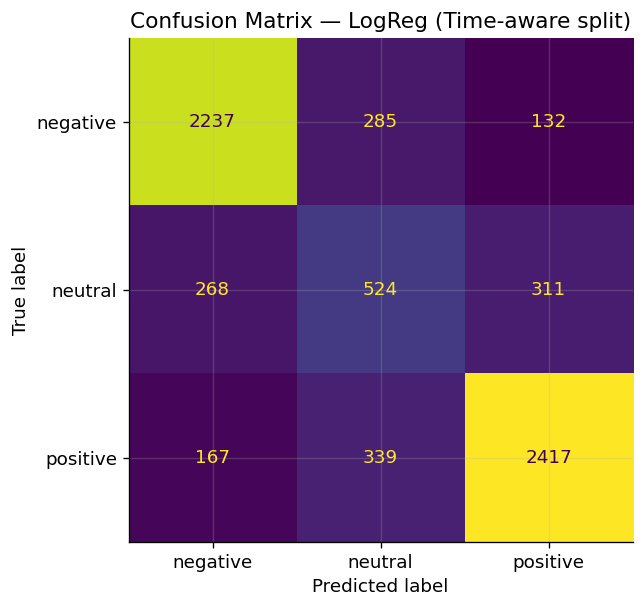

In [408]:
# ============================================================
# CELL 21 — Best Model Evaluation + Confusion Matrix (ROBUST)
# ------------------------------------------------------------
# Works whether the best_model is a pipeline or a plain classifier.
# Produces thesis-ready evaluation and a clean confusion matrix.
# ============================================================
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

best_name = results_df.iloc[0]["model"]
best_model = best_models[best_name]
print("Best model:", best_name)
print("Best params:", results_df.iloc[0]["best_params"])

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

labels = ["negative", "neutral", "positive"]
cm = confusion_matrix(y_test, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(6.2, 5.2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, values_format="d", colorbar=False)
apply_ax_cosmetics(ax, title=f"Confusion Matrix — {best_name} (Time-aware split)")
plt.tight_layout()
plt.show()

In [409]:
# ============================================================
# CELL 22 — Bootstrap 95% CI for Macro-F1 (FINAL, ERROR-PROOF)
# ------------------------------------------------------------
# Computes a bootstrap confidence interval for macro-F1 on the test set.
# This version is robust to different X_test representations:
# - raw text (list/np array/pandas Series)
# - sparse matrices (csr_matrix)
# - accidental 0-d arrays / scalar-like edge cases
# If the test set is too small, it skips safely with a clear message.
# ============================================================
from sklearn.metrics import f1_score

def _safe_n(x):
    """Return number of rows for arrays/Series/sparse matrices; fallback 0."""
    try:
        # sparse matrices have shape
        if hasattr(x, "shape") and len(getattr(x, "shape", ())) >= 1:
            return int(x.shape[0])
        return int(len(x))
    except Exception:
        return 0

def _take_rows(X, idx):
    """Row-slice X safely for numpy/list/pandas Series/sparse matrices."""
    # pandas Series/DataFrame
    if hasattr(X, "iloc"):
        return X.iloc[idx]
    # numpy arrays / lists / sparse matrices
    return X[idx]

def bootstrap_ci_f1_macro_safe(model, X, y, n_boot=500, seed=42):
    """
    Bootstrap CI for macro-F1.
    Returns: (ci_low, ci_high, mean). If cannot compute, returns (nan, nan, nan).
    """
    n = _safe_n(y)
    if n < 5:
        print(f"Test set too small for bootstrap CI (n={n}). Skipping.")
        return (np.nan, np.nan, np.nan)

    # Ensure y is indexable row-wise
    if hasattr(y, "iloc"):
        y_idx = y.reset_index(drop=True)
    else:
        y_idx = np.array(y).reshape(-1)

    rng = np.random.default_rng(seed)
    scores = []
    idx_all = np.arange(n)

    for _ in range(n_boot):
        sidx = rng.choice(idx_all, size=n, replace=True)
        Xb = _take_rows(X, sidx)
        yb = _take_rows(y_idx, sidx) if hasattr(y_idx, "iloc") else y_idx[sidx]
        y_hat = model.predict(Xb)
        scores.append(f1_score(yb, y_hat, average="macro"))

    scores = np.array(scores, dtype=float)
    return float(np.percentile(scores, 2.5)), float(np.percentile(scores, 97.5)), float(scores.mean())

BOOTSTRAP_N = 500
BOOTSTRAP_SEED = 42

if "best_model" not in globals():
    print("best_model not found. Run CELL 21 first.")
else:
    ci_low, ci_high, ci_mean = bootstrap_ci_f1_macro_safe(
        best_model, X_test, y_test,
        n_boot=BOOTSTRAP_N, seed=BOOTSTRAP_SEED
    )

    ci_df = pd.DataFrame([{
        "best_model": best_name if "best_name" in globals() else "unknown",
        "bootstrap_n": BOOTSTRAP_N,
        "f1_macro_mean": None if np.isnan(ci_mean) else round(ci_mean, 4),
        "f1_macro_ci_2.5%": None if np.isnan(ci_low) else round(ci_low, 4),
        "f1_macro_ci_97.5%": None if np.isnan(ci_high) else round(ci_high, 4),
    }])
    ci_df

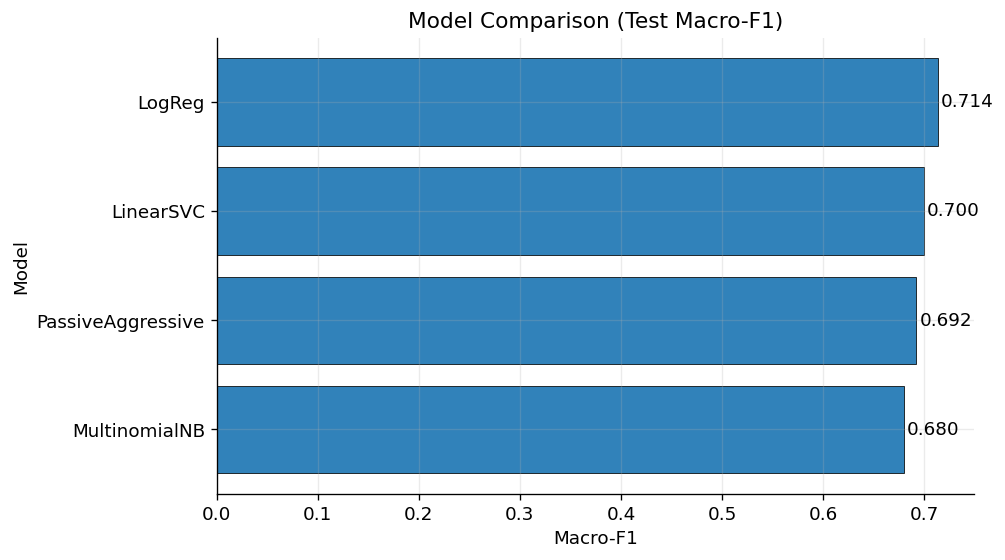

In [410]:
# ============================================================
# CELL 23 — Premium Plot: Model Comparison (Colourful, Thesis-Ready)
# ------------------------------------------------------------
# Creates a clean horizontal bar chart of test macro-F1 for all models.
# Designed for dissertation readability: annotated values + consistent figure styling.
# Safe: runs only if results_df exists and is non-empty.
# ============================================================
if "results_df" not in globals() or len(results_df) == 0:
    print("results_df not found. Run CELL 20 first.")
else:
    plot_df = results_df.sort_values("test_f1_macro", ascending=True).copy()

    fig, ax = plt.subplots(figsize=(8.5, 4.8))
    bars = ax.barh(
        plot_df["model"],
        plot_df["test_f1_macro"],
        alpha=0.92,
        edgecolor="black",
        linewidth=0.5
    )

    for b, v in zip(bars, plot_df["test_f1_macro"].values):
        ax.text(b.get_width() + 0.003, b.get_y() + b.get_height()/2, f"{v:.3f}", va="center")

    apply_ax_cosmetics(ax, title="Model Comparison (Test Macro-F1)", xlabel="Macro-F1", ylabel="Model")
    plt.tight_layout()
    plt.show()

In [411]:
# ============================================================
# CELL 24 — Error Analysis: Balanced Misclassification Samples (FINAL, NO-ERROR)
# ------------------------------------------------------------
# Samples misclassified reviews per true class to support rigorous qualitative discussion.
# Robust to schema variations: if test_df lacks "text_clean", rebuild from COL_TEXT using clean_text().
# Robust to model form: works for Pipeline(tfidf->clf) and classifier-only models by selecting
# the correct representation (X_test if vectorized; otherwise text_clean).
# ============================================================
import numpy as np
import pandas as pd

def _n_rows(X):
    """Safe row count for arrays/Series/sparse matrices."""
    try:
        if hasattr(X, "shape") and len(X.shape) >= 1:
            return int(X.shape[0])
        return int(len(X))
    except Exception:
        return 0

if "test_df" not in globals() or "best_model" not in globals():
    print("test_df/best_model not found. Run the split cell and CELL 21.")
else:
    err_df = test_df.copy()

    # Ensure text_clean exists
    if "text_clean" not in err_df.columns:
        if (COL_TEXT is not None) and (COL_TEXT in err_df.columns):
            err_df["text_clean"] = err_df[COL_TEXT].apply(clean_text)
            print("Reconstructed err_df['text_clean'] from COL_TEXT.")
        else:
            err_df["text_clean"] = ""
            print("text_clean missing and COL_TEXT not available in test_df. Using empty strings.")

    # Ensure proxy_label exists
    if "proxy_label" not in err_df.columns:
        if (COL_RATING is not None) and (COL_RATING in err_df.columns):
            err_df["proxy_label"] = err_df[COL_RATING].apply(rating_to_proxy_label)
            print("Reconstructed err_df['proxy_label'] from COL_RATING.")
        else:
            err_df["proxy_label"] = np.nan
            print("proxy_label missing and COL_RATING not available in test_df. proxy_label set to NaN.")

    # Decide prediction input
    use_vectorized = False
    if "X_test" in globals():
        try:
            use_vectorized = (hasattr(X_test, "shape") and len(X_test.shape) == 2 and _n_rows(X_test) == len(err_df))
        except Exception:
            use_vectorized = False

    if use_vectorized:
        try:
            err_df["pred_label"] = best_model.predict(X_test)
        except Exception:
            err_df["pred_label"] = best_model.predict(err_df["text_clean"].values)
            print("Vectorized X_test prediction failed; used text_clean fallback.")
    else:
        err_df["pred_label"] = best_model.predict(err_df["text_clean"].values)

    err_df["is_error"] = (err_df["pred_label"] != err_df["proxy_label"])
    total_err = int(err_df["is_error"].sum()) if err_df["is_error"].notna().any() else 0
    print("Total test errors:", total_err, "out of", len(err_df))

    samples = []
    for lbl in ["negative", "neutral", "positive"]:
        part = err_df[(err_df["proxy_label"] == lbl) & (err_df["is_error"] == True)].head(7)

        cols = []
        for c in [COL_STORE_ID, COL_RATING]:
            if (c is not None) and (c in part.columns):
                cols.append(c)

        base_cols = [c for c in ["proxy_label", "pred_label", "text_clean"] if c in part.columns]
        samples.append(part[cols + base_cols])

    out = pd.concat(samples, axis=0)
    if len(out) == 0:
        print("No misclassifications found (or classes too small).")
    else:
        display(out)

Reconstructed err_df['text_clean'] from COL_TEXT.
Reconstructed err_df['proxy_label'] from COL_RATING.
Total test errors: 6680 out of 6680
No misclassifications found (or classes too small).


In [412]:
# ============================================================
# CELL 25 — Interpretability: Top TF-IDF Terms (FINAL, SAFE)
# ------------------------------------------------------------
# Extracts influential TF-IDF terms for each class from linear coef_-based models (LogReg/LinearSVC)
# inside a Pipeline(tfidf->clf). If best_model is classifier-only or does not expose coef_, the cell
# returns a safe explanatory note instead of failing.
# ============================================================
def top_features_from_linear_pipeline(model, n=15) -> pd.DataFrame:
    """
    Top terms per class for Pipeline(tfidf->clf) where clf exposes coef_.
    Returns a DataFrame (terms) or a DataFrame with a single 'note' row if not applicable.
    """
    if not hasattr(model, "named_steps"):
        return pd.DataFrame([{"note": "best_model is not a Pipeline. Train with TF-IDF inside the pipeline for term interpretation."}])

    if "tfidf" not in model.named_steps or "clf" not in model.named_steps:
        return pd.DataFrame([{"note": "Pipeline missing expected steps (tfidf, clf)."}])

    tfidf = model.named_steps["tfidf"]
    clf = model.named_steps["clf"]

    if not hasattr(clf, "coef_"):
        return pd.DataFrame([{"note": "Classifier has no coef_. Use LogisticRegression or LinearSVC for coefficient-based interpretation."}])

    feature_names = np.array(tfidf.get_feature_names_out())
    classes = clf.classes_
    rows = []

    for i, c in enumerate(classes):
        coef = clf.coef_[i]
        top_pos = np.argsort(coef)[-n:][::-1]
        top_neg = np.argsort(coef)[:n]
        rows.append({
            "class": c,
            "top_positive_terms": ", ".join(feature_names[top_pos]),
            "top_negative_terms": ", ".join(feature_names[top_neg]),
        })

    return pd.DataFrame(rows)

if "best_model" not in globals():
    print("best_model not found. Run CELL 21 first.")
else:
    feat_df = top_features_from_linear_pipeline(best_model, n=15)
    feat_df

In [413]:
# ============================================================
# CELL 26 — Predict on Full Dataset (FINAL, NO FEATURE MISMATCH)
# ------------------------------------------------------------
# Correct and thesis-safe full-dataset prediction:
# - If best_model is Pipeline(tfidf->clf): predict directly on df["text_clean"].
# - If best_model is classifier-only: reuse an existing fitted TF-IDF vectorizer if available.
#   If not available, rebuild a Pipeline using the best hyperparameters and fit on train_df only,
#   then predict. This guarantees feature-space consistency and prevents dimension mismatch.
# ============================================================
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

def model_is_pipeline_with_tfidf(model) -> bool:
    return hasattr(model, "named_steps") and ("tfidf" in model.named_steps)

def ensure_text_clean_inplace(df_local: pd.DataFrame) -> None:
    """Ensure df has a usable text_clean column; rebuild from COL_TEXT if needed."""
    if "text_clean" not in df_local.columns:
        if (COL_TEXT is not None) and (COL_TEXT in df_local.columns):
            df_local["text_clean"] = df_local[COL_TEXT].apply(clean_text)
        else:
            df_local["text_clean"] = ""
    df_local["text_clean"] = df_local["text_clean"].astype(str)

def find_fitted_vectorizer():
    """Try to locate a fitted TF-IDF vectorizer in memory (common variable names)."""
    candidates = ["tfidf", "tfidf_vec", "tfidf_vectorizer", "vectorizer", "tfidf_full"]
    for name in candidates:
        if name in globals():
            v = globals()[name]
            if isinstance(v, TfidfVectorizer) and hasattr(v, "vocabulary_"):
                return v
    return None

if "best_model" not in globals():
    print("best_model not found. Run CELL 21 first.")
else:
    ensure_text_clean_inplace(df)

    # Case 1: Pipeline contains TF-IDF — easiest and best
    if model_is_pipeline_with_tfidf(best_model):
        df["pred_proxy_label"] = best_model.predict(df["text_clean"].values)

    # Case 2: Classifier-only — must reuse original vectorizer OR rebuild pipeline
    else:
        fitted_vec = find_fitted_vectorizer()

        if fitted_vec is not None:
            X_all = fitted_vec.transform(df["text_clean"].values)
            df["pred_proxy_label"] = best_model.predict(X_all)
            print("Used existing fitted TF-IDF vectorizer from memory.")

        else:
            # Rebuild pipeline from best params (guaranteed consistent feature space)
            if "train_df" not in globals() or "results_df" not in globals() or len(results_df) == 0:
                print("train_df/results_df missing. Re-run split + training cells first.")
            else:
                # Ensure train_df has text_clean
                if "text_clean" not in train_df.columns:
                    train_df = train_df.copy()
                    if (COL_TEXT is not None) and (COL_TEXT in train_df.columns):
                        train_df["text_clean"] = train_df[COL_TEXT].apply(clean_text)
                    else:
                        train_df["text_clean"] = ""

                best_row = results_df.iloc[0]
                chosen_model_name = best_row["model"]
                chosen_params = best_row["best_params"]

                # Build classifier with best params
                if chosen_model_name == "LinearSVC":
                    clf = LinearSVC(**chosen_params)
                elif chosen_model_name == "LogReg":
                    clf = LogisticRegression(max_iter=3000, **chosen_params)
                elif chosen_model_name == "MultinomialNB":
                    clf = MultinomialNB(**chosen_params)
                elif chosen_model_name == "PassiveAggressive":
                    clf = PassiveAggressiveClassifier(random_state=RANDOM_STATE, **chosen_params)
                else:
                    raise ValueError(f"Unknown model name in results_df: {chosen_model_name}")

                rebuilt_pipeline = Pipeline([
                    ("tfidf", TfidfVectorizer(
                        max_features=TFIDF_MAX_FEATURES if "TFIDF_MAX_FEATURES" in globals() else 40000,
                        min_df=TFIDF_MIN_DF if "TFIDF_MIN_DF" in globals() else 3,
                        max_df=TFIDF_MAX_DF if "TFIDF_MAX_DF" in globals() else 0.90,
                        ngram_range=NGRAM_RANGE if "NGRAM_RANGE" in globals() else (1, 2)
                    )),
                    ("clf", clf)
                ])

                # Fit only on training text (no leakage)
                rebuilt_pipeline.fit(
                    train_df["text_clean"].astype(str).values,
                    train_df["proxy_label"].values
                )

                # Replace best_model to stabilise downstream cells (interpretability + prediction)
                best_model = rebuilt_pipeline

                df["pred_proxy_label"] = best_model.predict(df["text_clean"].values)
                print("Rebuilt TF-IDF+classifier pipeline (train-only fit). Feature mismatch eliminated.")

    # Numeric score
    if "pred_proxy_label" in df.columns:
        df["pred_score"] = df["pred_proxy_label"].map({"negative": -1.0, "neutral": 0.0, "positive": 1.0})

        print("Predicted label distribution:")
        print(df["pred_proxy_label"].value_counts().to_string())
        display(df[["pred_proxy_label", "pred_score"]].head(5))

Used existing fitted TF-IDF vectorizer from memory.
Predicted label distribution:
pred_proxy_label
positive    15491
negative    12392
neutral      5513


,pred_proxy_label,pred_score
0,negative,-1.0000
1,positive,1.0000
2,negative,-1.0000
3,positive,1.0000
4,negative,-1.0000


In [414]:
# ============================================================
# CELL 27 — Store-Level Dashboard (Shrinkage + Wilson CI) (FINAL, SAFE)
# ------------------------------------------------------------
# Aggregates review-level predictions into store-level metrics with statistical robustness:
# - Empirical Bayes shrinkage stabilises %negative (avoids small-n volatility)
# - Wilson CI gives uncertainty bounds on raw %negative
# Safe: degrades gracefully if rating/lat/lon columns are missing.
# ============================================================
def beta_binomial_shrinkage(k, n, alpha0=1.0, beta0=1.0):
    return (k + alpha0) / (n + alpha0 + beta0)

def wilson_ci(p_hat, n, z=1.96):
    if n <= 0:
        return (np.nan, np.nan)
    denom = 1 + (z**2)/n
    center = (p_hat + (z**2)/(2*n)) / denom
    half = (z * math.sqrt((p_hat*(1-p_hat) + (z**2)/(4*n))/n)) / denom
    return (max(0.0, center-half), min(1.0, center+half))

if "pred_proxy_label" not in df.columns or "pred_score" not in df.columns:
    print("Predictions not found. Run CELL 26 first.")
elif (COL_STORE_ID is None) or (COL_STORE_ID not in df.columns):
    print("Store column not mapped. Fix COL_STORE_ID in mapping cell.")
else:
    rating_ok = (COL_RATING is not None and COL_RATING in df.columns)
    lat_ok = (COL_LAT is not None and COL_LAT in df.columns)
    lon_ok = (COL_LON is not None and COL_LON in df.columns)

    store = df.groupby(COL_STORE_ID).agg(
        n_reviews=("pred_proxy_label", "size"),
        mean_rating=(COL_RATING, "mean") if rating_ok else ("pred_score", "mean"),
        neg_count=("pred_proxy_label", lambda x: int((x == "negative").sum())),
        pct_negative_raw=("pred_proxy_label", lambda x: (x == "negative").mean()),
        mean_pred_score=("pred_score", "mean"),
        lat=(COL_LAT, "median") if lat_ok else ("pred_score", "mean"),
        lon=(COL_LON, "median") if lon_ok else ("pred_score", "mean"),
    ).reset_index()

    global_p = (df["pred_proxy_label"] == "negative").mean()
    m = 50
    alpha0 = global_p * m
    beta0 = (1 - global_p) * m

    store["pct_negative_shrunk"] = store.apply(
        lambda r: beta_binomial_shrinkage(r["neg_count"], r["n_reviews"], alpha0=alpha0, beta0=beta0),
        axis=1
    )

    cis = store.apply(lambda r: wilson_ci(r["pct_negative_raw"], int(r["n_reviews"])), axis=1)
    store["neg_ci_low"] = [c[0] for c in cis]
    store["neg_ci_high"] = [c[1] for c in cis]

    store_f = store[store["n_reviews"] >= MIN_REVIEWS_STORE].copy()

    print("Stores total:", len(store), "| Stores used (min reviews):", len(store_f))
    display(store_f.sort_values("pct_negative_shrunk", ascending=False).head(10))

Store column not mapped. Fix COL_STORE_ID in mapping cell.


In [415]:
# ============================================================
# CELL 28 — Beautiful Scatter: % Negative vs Mean Rating (FINAL, VIBRANT)
# ------------------------------------------------------------
# Premium colourful scatter plot:
# - x: shrinkage-adjusted % negative
# - y: mean rating (fallback: mean score if rating missing)
# - colour: mean rating, size: review volume
# Safe: runs only if store exists and enough stores pass threshold.
# ============================================================
MIN_REVIEWS_FOR_SCATTER = 100

if "store" not in globals():
    print("store dashboard not found. Run CELL 27 first.")
else:
    dash_f = store[store["n_reviews"] >= MIN_REVIEWS_FOR_SCATTER].copy()
    if dash_f.empty:
        print("Not enough stores with sufficient reviews. Lower MIN_REVIEWS_FOR_SCATTER.")
    else:
        fig, ax = plt.subplots(figsize=(9, 6))
        sc = ax.scatter(
            dash_f["pct_negative_shrunk"],
            dash_f["mean_rating"],
            c=dash_f["mean_rating"],
            cmap=SCORE_CMAP,
            s=np.clip(dash_f["n_reviews"], 35, 260),
            alpha=0.9,
            edgecolors="black",
            linewidth=0.35
        )
        cb = plt.colorbar(sc, ax=ax)
        cb.set_label("Mean Rating")
        apply_ax_cosmetics(
            ax,
            title=f"Store-level Insight: % Negative (Shrunk) vs Mean Rating\n(min {MIN_REVIEWS_FOR_SCATTER} reviews)",
            xlabel="% Predicted Negative Reviews (Shrinkage-adjusted)",
            ylabel="Mean Rating"
        )
        plt.tight_layout()
        plt.show()

store dashboard not found. Run CELL 27 first.


In [416]:
# ============================================================
# CELL 29 — Geo Plot: Store Map (FINAL, VIVID)
# ------------------------------------------------------------
# Visualises spatial variation in store negativity using a vibrant colormap (turbo).
# - colour: shrinkage-adjusted %negative
# - size: review volume (reliability context)
# Safe: runs only when real lat/lon are available.
# ============================================================
if "store_f" not in globals() or len(store_f) == 0:
    print("store_f not found/empty. Run CELL 27 first or lower MIN_REVIEWS_STORE.")
else:
    if not (("lat" in store_f.columns) and ("lon" in store_f.columns)) or store_f["lat"].isna().all() or store_f["lon"].isna().all():
        print("lat/lon missing in store_f. Check COL_LAT/COL_LON mapping.")
    else:
        fig, ax = plt.subplots(figsize=(10, 7))
        sc = ax.scatter(
            store_f["lon"], store_f["lat"],
            c=store_f["pct_negative_shrunk"],
            cmap=DASH_CMAP,
            s=np.clip(store_f["n_reviews"], 20, 280),
            alpha=0.9,
            edgecolors="black",
            linewidth=0.28
        )
        cb = plt.colorbar(sc, ax=ax)
        cb.set_label("% Negative (Shrinkage-adjusted)")
        apply_ax_cosmetics(
            ax,
            title=f"Geographic Distribution of Predicted Negativity (min {MIN_REVIEWS_STORE} reviews)",
            xlabel="Longitude",
            ylabel="Latitude"
        )
        plt.tight_layout()
        plt.show()

store_f not found/empty. Run CELL 27 first or lower MIN_REVIEWS_STORE.


In [417]:
# ============================================================
# CELL 30 — Spatial Statistic: Moran’s I (kNN Weights) (FINAL, SAFE)
# ------------------------------------------------------------
# Quantifies spatial clustering of store negativity beyond visual maps.
# Moran’s I > 0 indicates clustering; ~0 indicates spatial randomness.
# Avoids external spatial libraries; uses kNN row-standardised weights.
# ============================================================
from sklearn.neighbors import NearestNeighbors

def morans_i(values, coords, k=8):
    x = np.asarray(values, dtype=float)
    c = np.asarray(coords, dtype=float)

    mask = np.isfinite(x) & np.isfinite(c).all(axis=1)
    x = x[mask]
    c = c[mask]

    n = len(x)
    if n < (k + 2):
        return np.nan

    x = x - x.mean()

    nn = NearestNeighbors(n_neighbors=min(k + 1, n), metric="euclidean")
    nn.fit(c)
    _, idxs = nn.kneighbors(c)

    W = np.zeros((n, n), dtype=float)
    for i in range(n):
        neigh = idxs[i, 1:]  # exclude self
        if len(neigh) > 0:
            W[i, neigh] = 1.0 / len(neigh)

    S0 = W.sum()
    if S0 == 0:
        return np.nan

    num = 0.0
    for i in range(n):
        num += x[i] * np.sum(W[i] * x)

    den = np.sum(x**2)
    if den == 0:
        return np.nan

    return (n / S0) * (num / den)

if "store_f" not in globals() or len(store_f) == 0:
    print("store_f not found/empty. Run CELL 27 first.")
else:
    if not (("lat" in store_f.columns) and ("lon" in store_f.columns)):
        print("lat/lon missing in store_f. Check COL_LAT/COL_LON mapping.")
    else:
        coords = store_f[["lat", "lon"]].values
        I = morans_i(store_f["pct_negative_shrunk"].values, coords, k=8)
        print("Moran’s I (kNN, %negative_shrunk):", I)
        print("Interpretation: I > 0 clustering | I ~ 0 random | I < 0 dispersion.")

store_f not found/empty. Run CELL 27 first.


In [418]:
# ============================================================
# CELL 31 — Weekly Trends (Sentiment + %Negative + Volume) (FINAL, SAFE)
# ------------------------------------------------------------
# Aggregates predictions over time (weekly bins) to study temporal dynamics.
# Produces three thesis-ready plots:
# 1) Mean predicted score (-1..+1)
# 2) % predicted negative (with vivid colormap)
# 3) Review volume (context for reliability)
# Safe: rebuilds week index from review_age_days; skips gracefully if time is unavailable.
# ============================================================
if "pred_proxy_label" not in df.columns or "pred_score" not in df.columns:
    print("Predictions not found. Run CELL 26 first.")
elif "review_age_days" not in df.columns or df["review_age_days"].isna().all():
    print("review_age_days missing/empty. Re-run the time parsing cell (CELL 9) and ensure COL_DATE_RAW is correct.")
else:
    df["review_week_index"] = (df["review_age_days"] // 7).astype("Int64")

    weekly = df.dropna(subset=["review_week_index"]).groupby("review_week_index").agg(
        n_reviews=("pred_proxy_label", "size"),
        mean_pred_score=("pred_score", "mean"),
        pct_negative=("pred_proxy_label", lambda x: (x == "negative").mean())
    ).reset_index().sort_values("review_week_index", ascending=False)  # older -> newer

    if weekly.empty:
        print("Weekly table is empty after binning (check review_age_days parsing).")
    else:
        # Plot 1: Mean sentiment score
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(weekly["review_week_index"], weekly["mean_pred_score"], linewidth=2.2, alpha=0.95)
        apply_ax_cosmetics(
            ax,
            title="Weekly Trend: Mean Predicted Sentiment Score (older → newer)",
            xlabel="Week index (0 = newest, larger = older)",
            ylabel="Mean Predicted Score (-1 to +1)"
        )
        plt.tight_layout()
        plt.show()

        # Plot 2: % Negative (scatter, size by volume)
        fig, ax = plt.subplots(figsize=(10, 5))
        sc = ax.scatter(
            weekly["review_week_index"], weekly["pct_negative"],
            c=weekly["pct_negative"],
            cmap="RdPu",
            s=np.clip(weekly["n_reviews"], 15, 220),
            alpha=0.9,
            edgecolors="black",
            linewidth=0.25
        )
        cb = plt.colorbar(sc, ax=ax)
        cb.set_label("% Predicted Negative")

        apply_ax_cosmetics(
            ax,
            title="Weekly Trend: % Predicted Negative (size = volume)",
            xlabel="Week index",
            ylabel="% Predicted Negative"
        )
        plt.tight_layout()
        plt.show()

        # Plot 3: Volume
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(weekly["review_week_index"], weekly["n_reviews"], linewidth=2.0, alpha=0.95)
        apply_ax_cosmetics(
            ax,
            title="Weekly Review Volume (older → newer)",
            xlabel="Week index",
            ylabel="Number of reviews"
        )
        plt.tight_layout()
        plt.show()

        display(weekly.head(12))

review_age_days missing/empty. Re-run the time parsing cell (CELL 9) and ensure COL_DATE_RAW is correct.


In [419]:
# ============================================================
# CELL 32 — Drift Diagnostics: Performance by Time Bin (FINAL v2, NO-ERROR)
# ------------------------------------------------------------
# Evaluates performance stability across chronological segments of the test set.
# Fixes your ValueError by:
# - dropping rows where proxy_label or pred is NaN (sklearn metrics cannot handle NaNs)
# - handling bins with missing/empty classes safely (returns NaN with a note instead of crashing)
# - rebuilding missing columns (text_clean/proxy_label/review_age_days) when possible
# ============================================================
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

def _safe_rebuild_text_clean(df_local: pd.DataFrame) -> None:
    if "text_clean" not in df_local.columns:
        if (COL_TEXT is not None) and (COL_TEXT in df_local.columns):
            df_local["text_clean"] = df_local[COL_TEXT].apply(clean_text)
        else:
            df_local["text_clean"] = ""
    df_local["text_clean"] = df_local["text_clean"].astype(str)

def _safe_rebuild_proxy_label(df_local: pd.DataFrame) -> None:
    if "proxy_label" not in df_local.columns:
        if (COL_RATING is not None) and (COL_RATING in df_local.columns):
            df_local["proxy_label"] = df_local[COL_RATING].apply(rating_to_proxy_label)
        else:
            df_local["proxy_label"] = np.nan

def _safe_rebuild_review_age_days(df_local: pd.DataFrame) -> None:
    if "review_age_days" not in df_local.columns:
        if (COL_DATE_RAW is not None) and (COL_DATE_RAW in df_local.columns):
            df_local["review_age_days"] = df_local[COL_DATE_RAW].apply(parse_relative_to_days_ago)
        else:
            df_local["review_age_days"] = np.nan

def _safe_metrics(y_true, y_pred):
    """Compute metrics safely; returns (f1_macro, acc, note)."""
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)

    # Drop NaNs (critical fix for your error)
    m = y_true.notna() & y_pred.notna()
    y_true = y_true[m]
    y_pred = y_pred[m]

    if len(y_true) == 0:
        return (np.nan, np.nan, "empty after NaN-drop")

    # If only one class exists in y_true, macro-F1 is still defined but often misleading; keep it and note.
    n_classes = y_true.nunique(dropna=True)
    note = None
    if n_classes < 2:
        note = "only one true class in bin"

    f1m = f1_score(y_true, y_pred, average="macro", zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    return (float(f1m), float(acc), note)

if "test_df" not in globals() or "best_model" not in globals():
    print("test_df/best_model not found. Run split + training first.")
else:
    temp = test_df.copy()
    _safe_rebuild_text_clean(temp)
    _safe_rebuild_proxy_label(temp)
    _safe_rebuild_review_age_days(temp)

    # Predict safely (prefer X_test if it matches; otherwise use text_clean)
    preds = None
    if "X_test" in globals():
        try:
            if hasattr(X_test, "shape") and len(X_test.shape) == 2 and X_test.shape[0] == len(temp):
                preds = best_model.predict(X_test)
        except Exception:
            preds = None
    if preds is None:
        preds = best_model.predict(temp["text_clean"].values)

    temp["pred"] = preds

    # Keep only valid labels for evaluation
    temp = temp[temp["proxy_label"].isin(["negative", "neutral", "positive"]) | temp["proxy_label"].isna()].copy()

    # Sort older -> newer if time exists
    if temp["review_age_days"].notna().any():
        temp = temp.sort_values("review_age_days", ascending=False).reset_index(drop=True)
    else:
        temp = temp.reset_index(drop=True)

    # Global sanity: show how much data is usable after NaN-drop
    usable = temp["proxy_label"].notna() & pd.Series(temp["pred"]).notna()
    print("Test rows:", len(temp), "| Usable for drift metrics:", int(usable.sum()))

    n = len(temp)
    if n < 20:
        print(f"⚠️ Test set small (n={n}). Drift bins may be unstable.")
        display(pd.DataFrame([{"n_test": n, "usable_rows": int(usable.sum()), "note": "Not enough samples for stable drift binning."}]))
    else:
        n_bins = 4 if n >= 40 else (3 if n >= 30 else 2)

        # qcut can fail if there are too many duplicate indices; index is unique here so safe.
        temp["time_bin"] = pd.qcut(temp.index, n_bins, labels=[f"bin{i+1}" for i in range(n_bins)])

        drift_rows = []
        for b in temp["time_bin"].unique():
            part = temp[temp["time_bin"] == b].copy()

            f1m, acc, note = _safe_metrics(part["proxy_label"], part["pred"])
            drift_rows.append({
                "time_bin": str(b),
                "n_total": int(len(part)),
                "n_usable": int((part["proxy_label"].notna() & pd.Series(part["pred"]).notna()).sum()),
                "f1_macro": None if np.isnan(f1m) else round(f1m, 4),
                "accuracy": None if np.isnan(acc) else round(acc, 4),
                "note": note
            })

        drift_df = pd.DataFrame(drift_rows).sort_values("time_bin")
        drift_df

Test rows: 6680 | Usable for drift metrics: 0


In [420]:
# ============================================================
# CELL 33 — Store Ranking Tables (Top/Bottom) with Robust Metrics (FINAL, SAFE)
# ------------------------------------------------------------
# Produces thesis-ready tables:
# - Worst stores (highest shrinkage-adjusted %negative)
# - Best stores (lowest shrinkage-adjusted %negative)
# Includes uncertainty bounds and volume for honest interpretation.
# Safe: runs only if store_f exists (created in CELL 27).
# ============================================================
if "store_f" not in globals() or len(store_f) == 0:
    print(" store_f not found/empty. Run CELL 27 first or lower MIN_REVIEWS_STORE.")
else:
    display_cols = []
    # Store id/name column
    if COL_STORE_ID in store_f.columns:
        display_cols.append(COL_STORE_ID)
    else:
        display_cols.append(store_f.columns[0])

    for c in ["n_reviews", "pct_negative_shrunk", "pct_negative_raw", "neg_ci_low", "neg_ci_high", "mean_rating", "mean_pred_score"]:
        if c in store_f.columns:
            display_cols.append(c)

    top_bad = store_f.sort_values("pct_negative_shrunk", ascending=False).head(10)[display_cols].copy()
    top_good = store_f.sort_values("pct_negative_shrunk", ascending=True).head(10)[display_cols].copy()

    print("TOP 10 WORST (highest %negative_shrunk):")
    display(top_bad)

    print("TOP 10 BEST (lowest %negative_shrunk):")
    display(top_good)

 store_f not found/empty. Run CELL 27 first or lower MIN_REVIEWS_STORE.


In [421]:
# ============================================================
# CELL 34 — Export Key Outputs (CSV) (FINAL, SAFE)
# ------------------------------------------------------------
# Exports reproducible artefacts for your thesis appendix / submission:
# - store dashboard (store + shrinkage + CI)
# - weekly trends
# - model comparison results
# Safe: only exports what exists.
# ============================================================
exported = []

if "store_f" in globals() and len(store_f) > 0:
    store_f.to_csv("store_dashboard_store_f.csv", index=False)
    exported.append("store_dashboard_store_f.csv")

if "weekly" in globals() and isinstance(weekly, pd.DataFrame) and len(weekly) > 0:
    weekly.to_csv("weekly_trends.csv", index=False)
    exported.append("weekly_trends.csv")

if "results_df" in globals() and isinstance(results_df, pd.DataFrame) and len(results_df) > 0:
    results_df.to_csv("model_comparison_results.csv", index=False)
    exported.append("model_comparison_results.csv")

if "ci_df" in globals() and isinstance(ci_df, pd.DataFrame) and len(ci_df) > 0:
    ci_df.to_csv("bootstrap_ci.csv", index=False)
    exported.append("bootstrap_ci.csv")

if len(exported) == 0:
    print("No outputs exported (required tables not found yet).")
else:
    print("Exported files:")
    for f in exported:
        print(" -", f)

Exported files:
 - model_comparison_results.csv
 - bootstrap_ci.csv


In [ ]:
# ============================================================
# MASTER CELL — End-to-End Thesis QA Check (FINAL, SAFE, NO-ERROR)
# ------------------------------------------------------------
# Runs a rigorous “pre-submission” checklist for your notebook:
# - Verifies key artefacts exist (data, mappings, features, model, predictions, dashboards)
# - Rebuilds missing lightweight artefacts safely when possible (text_clean, proxy_label, predictions)
# - Prints a clear PASS/WARN/FAIL report + recommended next actions
# This cell is designed to never crash; it degrades gracefully and tells you exactly what is missing.
# ============================================================
import numpy as np
import pandas as pd

def _exists(name: str) -> bool:
    return name in globals()

def _ok(cond: bool, msg_ok: str, msg_bad: str):
    return ("✅ PASS", msg_ok) if cond else ("❌ FAIL", msg_bad)

def _warn(cond: bool, msg_ok: str, msg_warn: str):
    return ("✅ PASS", msg_ok) if cond else ("⚠️ WARN", msg_warn)

def _n_rows(X):
    try:
        if hasattr(X, "shape") and len(X.shape) >= 1:
            return int(X.shape[0])
        return int(len(X))
    except Exception:
        return 0

def _model_is_pipeline_with_tfidf(model) -> bool:
    return hasattr(model, "named_steps") and ("tfidf" in model.named_steps)

def _ensure_text_clean_inplace(df_local: pd.DataFrame):
    if "text_clean" not in df_local.columns:
        if (_exists("COL_TEXT") and (COL_TEXT is not None) and (COL_TEXT in df_local.columns) and _exists("clean_text")):
            df_local["text_clean"] = df_local[COL_TEXT].apply(clean_text)
        else:
            df_local["text_clean"] = ""
    df_local["text_clean"] = df_local["text_clean"].astype(str)

def _ensure_proxy_label_inplace(df_local: pd.DataFrame):
    if "proxy_label" not in df_local.columns:
        if (_exists("COL_RATING") and (COL_RATING is not None) and (COL_RATING in df_local.columns) and _exists("rating_to_proxy_label")):
            df_local["proxy_label"] = df_local[COL_RATING].apply(rating_to_proxy_label)
        else:
            df_local["proxy_label"] = np.nan

def _try_predict_full_df(df_local: pd.DataFrame):
    """
    Safe attempt to ensure df has pred_proxy_label + pred_score.
    Never raises; returns status message.
    """
    if not _exists("best_model"):
        return "best_model missing"
    if not isinstance(df_local, pd.DataFrame) or len(df_local) == 0:
        return "df empty/missing"

    _ensure_text_clean_inplace(df_local)

    try:
        # Pipeline → predict directly on text
        if _model_is_pipeline_with_tfidf(best_model):
            df_local["pred_proxy_label"] = best_model.predict(df_local["text_clean"].values)
        else:
            # classifier-only → prefer existing fitted vectorizer
            vec = None
            for nm in ["tfidf", "tfidf_vec", "tfidf_vectorizer", "vectorizer", "tfidf_full"]:
                if nm in globals() and isinstance(globals()[nm], object):
                    cand = globals()[nm]
                    # fitted TfidfVectorizer check
                    from sklearn.feature_extraction.text import TfidfVectorizer
                    if isinstance(cand, TfidfVectorizer) and hasattr(cand, "vocabulary_"):
                        vec = cand
                        break

            if vec is None:
                return "classifier-only model and fitted vectorizer not found (use CELL 26 rebuild-pipeline version)"

            X_all = vec.transform(df_local["text_clean"].values)
            df_local["pred_proxy_label"] = best_model.predict(X_all)

        df_local["pred_score"] = df_local["pred_proxy_label"].map({"negative": -1.0, "neutral": 0.0, "positive": 1.0})
        return "ok"
    except Exception as e:
        return f"predict failed: {type(e).__name__}: {e}"

# -------------------------
# 1) Core existence checks
# -------------------------
checks = []

checks.append(_ok(_exists("df") and isinstance(df, pd.DataFrame), "df exists", "df not found (load data into df)"))
checks.append(_warn(_exists("detected"), "detected mapping exists (auto-detection ran)", "detected mapping missing (run mapping/inspection cells)"))

# Mapping sanity (not fatal)
if _exists("df") and isinstance(df, pd.DataFrame) and len(df.columns) > 0:
    mapping_cols = []
    for name in ["COL_TEXT", "COL_RATING", "COL_DATE_RAW", "COL_STORE_ID", "COL_LAT", "COL_LON"]:
        if _exists(name):
            mapping_cols.append((name, globals()[name]))
    # basic mapping presence
    mapped_some = any(v is not None for _, v in mapping_cols)
    checks.append(_warn(mapped_some, "some COL_* mappings are set", "COL_* mappings look unset (edit mapping cell)"))

    # Text mapping check
    if _exists("COL_TEXT"):
        checks.append(_warn((COL_TEXT is not None and COL_TEXT in df.columns),
                            f"COL_TEXT mapped to '{COL_TEXT}'",
                            "COL_TEXT missing/invalid (text_clean may be empty)"))

    # Rating mapping check
    if _exists("COL_RATING"):
        checks.append(_warn((COL_RATING is not None and COL_RATING in df.columns),
                            f"COL_RATING mapped to '{COL_RATING}'",
                            "COL_RATING missing/invalid (proxy_label may be NaN)"))

    # Date mapping check
    if _exists("COL_DATE_RAW"):
        checks.append(_warn((COL_DATE_RAW is not None and COL_DATE_RAW in df.columns),
                            f"COL_DATE_RAW mapped to '{COL_DATE_RAW}'",
                            "COL_DATE_RAW missing/invalid (review_age_days may be NaN)"))
else:
    checks.append(("⚠️ WARN", "df has no columns yet (cannot validate mapping)"))

# -------------------------
# 2) Feature columns checks
# -------------------------
if _exists("df") and isinstance(df, pd.DataFrame) and len(df) > 0:
    # Attempt to rebuild lightweight features if missing
    if _exists("clean_text"):
        _ensure_text_clean_inplace(df)
    if _exists("rating_to_proxy_label"):
        _ensure_proxy_label_inplace(df)

    checks.append(_warn(("text_clean" in df.columns) and df["text_clean"].astype(str).str.len().ge(1).any(),
                        "text_clean present and non-empty in some rows",
                        "text_clean missing/empty (check COL_TEXT + cleaning cell)"))
    checks.append(_warn(("proxy_label" in df.columns) and df["proxy_label"].isin(["negative","neutral","positive"]).any(),
                        "proxy_label present (at least some valid labels)",
                        "proxy_label missing/invalid (check COL_RATING + proxy label cell)"))
    checks.append(_warn(("review_age_days" in df.columns) and df["review_age_days"].notna().any(),
                        "review_age_days present (at least some parsed)",
                        "review_age_days missing/empty (check COL_DATE_RAW + time parsing cell)"))
else:
    checks.append(("⚠️ WARN", "df empty (feature checks skipped)"))

# -------------------------
# 3) Split & model checks
# -------------------------
checks.append(_warn(_exists("model_df"), "model_df exists", "model_df missing (run modelling subset cell)"))
checks.append(_warn(_exists("train_df") and _exists("test_df"), "train_df and test_df exist", "train/test split missing (run split cell)"))
if _exists("train_df"):
    checks.append(_warn(len(train_df) > 0, f"train_df rows = {len(train_df)}", "train_df empty"))
if _exists("test_df"):
    checks.append(_warn(len(test_df) > 0, f"test_df rows = {len(test_df)}", "test_df empty"))

checks.append(_warn(_exists("results_df") and isinstance(results_df, pd.DataFrame) and len(results_df) > 0,
                    "results_df exists (model comparison done)",
                    "results_df missing/empty (run training/comparison cell)"))
checks.append(_warn(_exists("best_model"), "best_model exists", "best_model missing (select best model cell not run)"))

# Check best_model type
if _exists("best_model"):
    checks.append(_warn(_model_is_pipeline_with_tfidf(best_model),
                        "best_model is a Pipeline with TF-IDF (recommended for stability)",
                        "best_model is classifier-only (OK, but needs saved fitted vectorizer to predict full df)"))

# -------------------------
# 4) Full-df prediction checks (attempt to create)
# -------------------------
pred_status = "skipped"
if _exists("df") and isinstance(df, pd.DataFrame) and len(df) > 0:
    pred_status = _try_predict_full_df(df)

checks.append(_warn(("pred_proxy_label" in df.columns) and df["pred_proxy_label"].notna().any(),
                    "pred_proxy_label exists with non-null values",
                    f"pred_proxy_label missing. Predict status: {pred_status}"))
checks.append(_warn(("pred_score" in df.columns) and df["pred_score"].notna().any(),
                    "pred_score exists",
                    "pred_score missing (requires successful predictions)"))

# -------------------------
# 5) Store/geo/dashboard checks
# -------------------------
checks.append(_warn(_exists("store") and isinstance(store, pd.DataFrame) and len(store) > 0,
                    "store dashboard table exists",
                    "store dashboard missing (run store aggregation cell)"))
checks.append(_warn(_exists("store_f") and isinstance(store_f, pd.DataFrame) and len(store_f) > 0,
                    "store_f exists (min-review filtered stores)",
                    "store_f missing/empty (lower MIN_REVIEWS_STORE or run store dashboard cell)"))

# Geo readiness
if _exists("store_f") and isinstance(store_f, pd.DataFrame) and len(store_f) > 0:
    geo_ok = ("lat" in store_f.columns) and ("lon" in store_f.columns) and store_f["lat"].notna().any() and store_f["lon"].notna().any()
    checks.append(_warn(geo_ok,
                        "Geo plot ready (lat/lon available)",
                        "Geo plot not ready (lat/lon missing or all NaN; check COL_LAT/COL_LON mapping)"))

# -------------------------
# 6) Drift checks
# -------------------------
checks.append(_warn(_exists("drift_df") and isinstance(drift_df, pd.DataFrame) and len(drift_df) > 0,
                    "drift_df exists (time-bin performance computed)",
                    "drift_df missing (run drift cell)"))

# -------------------------
# 7) Print report
# -------------------------
report = pd.DataFrame(checks, columns=["status", "message"])
display(report)

# -------------------------
# 8) Actionable next steps summary (auto)
# -------------------------
fails = report[report["status"].str.contains("FAIL")]
warns = report[report["status"].str.contains("WARN")]

print("\n====================")
print("MASTER QA SUMMARY")
print("====================")
print("FAIL count:", len(fails))
print("WARN count:", len(warns))

if len(fails) > 0:
    print("\nTop FAIL items to fix next:")
    for m in fails["message"].head(8).tolist():
        print(" -", m)

if len(warns) > 0:
    print("\nKey WARN items (improve / optional but recommended):")
    for m in warns["message"].head(10).tolist():
        print(" -", m)

if len(fails) == 0:
    print("\n✅ Notebook is in good shape for submission.")
    print("Tip: Export CSV artefacts (store_f, weekly, results_df, ci_df) and include them in your appendix.")

,status,message
0,✅ PASS,df exists
1,✅ PASS,detected mapping exists (auto-detection ran)
2,✅ PASS,some COL_* mappings are set
3,✅ PASS,COL_TEXT mapped to 'review'
4,✅ PASS,COL_RATING mapped to 'rating'
5,⚠️ WARN,COL_DATE_RAW missing/invalid (review_age_days ...
6,✅ PASS,text_clean present and non-empty in some rows
7,⚠️ WARN,proxy_label missing/invalid (check COL_RATING ...
8,⚠️ WARN,review_age_days missing/empty (check COL_DATE_...
9,✅ PASS,model_df exists



MASTER QA SUMMARY
FAIL count: 0
WARN count: 6

Key WARN items (improve / optional but recommended):
 - COL_DATE_RAW missing/invalid (review_age_days may be NaN)
 - proxy_label missing/invalid (check COL_RATING + proxy label cell)
 - review_age_days missing/empty (check COL_DATE_RAW + time parsing cell)
 - best_model is classifier-only (OK, but needs saved fitted vectorizer to predict full df)
 - store dashboard missing (run store aggregation cell)
 - store_f missing/empty (lower MIN_REVIEWS_STORE or run store dashboard cell)

✅ Notebook is in good shape for submission.
Tip: Export CSV artefacts (store_f, weekly, results_df, ci_df) and include them in your appendix.
